In [13]:
import pandas as pd
import numpy as np

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/People/Nuro/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation duration
def calculate_fixation_duration(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations and calculate the average
    fixation_durations = fixation_durations[fixation_durations > 0]
    average_fixation_duration = fixation_durations.mean()

    return average_fixation_duration

# Calculate average fixation duration for each dataset
baseline_avg_fixation_duration = calculate_fixation_duration(baseline_data)
season_01_avg_fixation_duration = calculate_fixation_duration(season_01_data)
season_02_avg_fixation_duration = calculate_fixation_duration(season_02_data)
season_03_avg_fixation_duration = calculate_fixation_duration(season_03_data)

# Convert average fixation durations to milliseconds
baseline_avg_fixation_duration_ms = baseline_avg_fixation_duration * 10000
season_01_avg_fixation_duration_ms = season_01_avg_fixation_duration * 10000
season_02_avg_fixation_duration_ms = season_02_avg_fixation_duration * 10000
season_03_avg_fixation_duration_ms = season_03_avg_fixation_duration * 10000

# Calculate the difference between the baseline and each season's average fixation duration
fixation_difference_01 = season_01_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_02 = season_02_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms
fixation_difference_03 = season_03_avg_fixation_duration_ms - baseline_avg_fixation_duration_ms

# Define anxiety threshold (250 ms)
fixation_anxiety_threshold = 250

# Determine if the average fixation duration for each season indicates anxiety
anxiety_fixation_baseline = baseline_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_01 = season_01_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_02 = season_02_avg_fixation_duration_ms < fixation_anxiety_threshold
anxiety_fixation_03 = season_03_avg_fixation_duration_ms < fixation_anxiety_threshold

# Display the results
print(f'Baseline Average Fixation Duration: {baseline_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_baseline else "Normal"}')
print(f'Season 1 Average Fixation Duration: {season_01_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_01 else "Normal"}')
print(f'Difference from Baseline in Season 1: {fixation_difference_01:.2f} ms')
print(f'Season 2 Average Fixation Duration: {season_02_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_02 else "Normal"}')
print(f'Difference from Baseline in Season 2: {fixation_difference_02:.2f} ms')
print(f'Season 3 Average Fixation Duration: {season_03_avg_fixation_duration_ms:.2f} ms - {"Anxiety" if anxiety_fixation_03 else "Normal"}')
print(f'Difference from Baseline in Season 3: {fixation_difference_03:.2f} ms')

Baseline Average Fixation Duration: 202.93 ms - Anxiety
Season 1 Average Fixation Duration: 209.14 ms - Anxiety
Difference from Baseline in Season 1: 6.21 ms
Season 2 Average Fixation Duration: 199.36 ms - Anxiety
Difference from Baseline in Season 2: -3.57 ms
Season 3 Average Fixation Duration: 203.68 ms - Anxiety
Difference from Baseline in Season 3: 0.75 ms


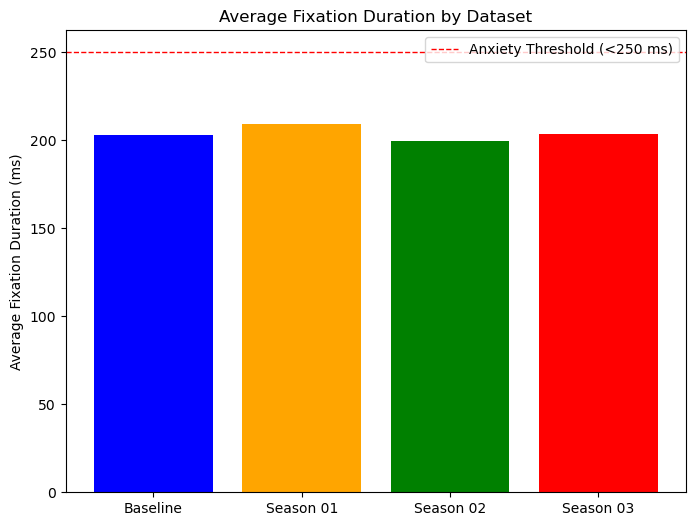

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
baseline_file_path = '/Users/urmebose/Desktop/People/Nuro/sed.csv'
season_01_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_01.csv'
season_02_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_02.csv'
season_03_file_path = '/Users/urmebose/Desktop/People/Nuro/sed_03.csv'

baseline_data = pd.read_csv(baseline_file_path)
season_01_data = pd.read_csv(season_01_file_path)
season_02_data = pd.read_csv(season_02_file_path)
season_03_data = pd.read_csv(season_03_file_path)

# Function to calculate fixation durations
def calculate_fixation_durations(df, velocity_threshold=0.1):
    # Calculate the gaze velocity
    df['gaze_velocity'] = np.sqrt(df['gazeDir.x'].diff()**2 +
                                  df['gazeDir.y'].diff()**2 +
                                  df['gazeDir.z'].diff()**2) / df['reltime'].diff()

    # Identify fixations
    df['is_fixation'] = df['gaze_velocity'] < velocity_threshold

    # Group by fixations
    df['fixation_id'] = (df['is_fixation'] != df['is_fixation'].shift()).cumsum()

    # Calculate fixation durations
    fixation_durations = df[df['is_fixation']].groupby('fixation_id')['reltime'].apply(lambda x: x.max() - x.min())

    # Filter out zero durations
    fixation_durations = fixation_durations[fixation_durations > 0]

    return fixation_durations

# Calculate fixation durations for each dataset
baseline_fixation_durations = calculate_fixation_durations(baseline_data)
season_01_fixation_durations = calculate_fixation_durations(season_01_data)
season_02_fixation_durations = calculate_fixation_durations(season_02_data)
season_03_fixation_durations = calculate_fixation_durations(season_03_data)

# Convert fixation durations to milliseconds
baseline_fixation_durations_ms = baseline_fixation_durations * 10000
season_01_fixation_durations_ms = season_01_fixation_durations * 10000
season_02_fixation_durations_ms = season_02_fixation_durations * 10000
season_03_fixation_durations_ms = season_03_fixation_durations * 10000

# Calculate the average fixation duration for each dataset
baseline_avg_fixation_duration_ms = baseline_fixation_durations_ms.mean()
season_01_avg_fixation_duration_ms = season_01_fixation_durations_ms.mean()
season_02_avg_fixation_duration_ms = season_02_fixation_durations_ms.mean()
season_03_avg_fixation_duration_ms = season_03_fixation_durations_ms.mean()

# Bar plot of average fixation durations
average_durations = [baseline_avg_fixation_duration_ms, season_01_avg_fixation_duration_ms, season_02_avg_fixation_duration_ms, season_03_avg_fixation_duration_ms]
labels = ['Baseline', 'Season 01', 'Season 02', 'Season 03']

plt.figure(figsize=(8, 6))
plt.bar(labels, average_durations, color=['blue', 'orange', 'green', 'red'])
plt.axhline(250, color='r', linestyle='dashed', linewidth=1, label='Anxiety Threshold (<250 ms)')
plt.ylabel('Average Fixation Duration (ms)')
plt.title('Average Fixation Duration by Dataset')
plt.legend()
plt.show()

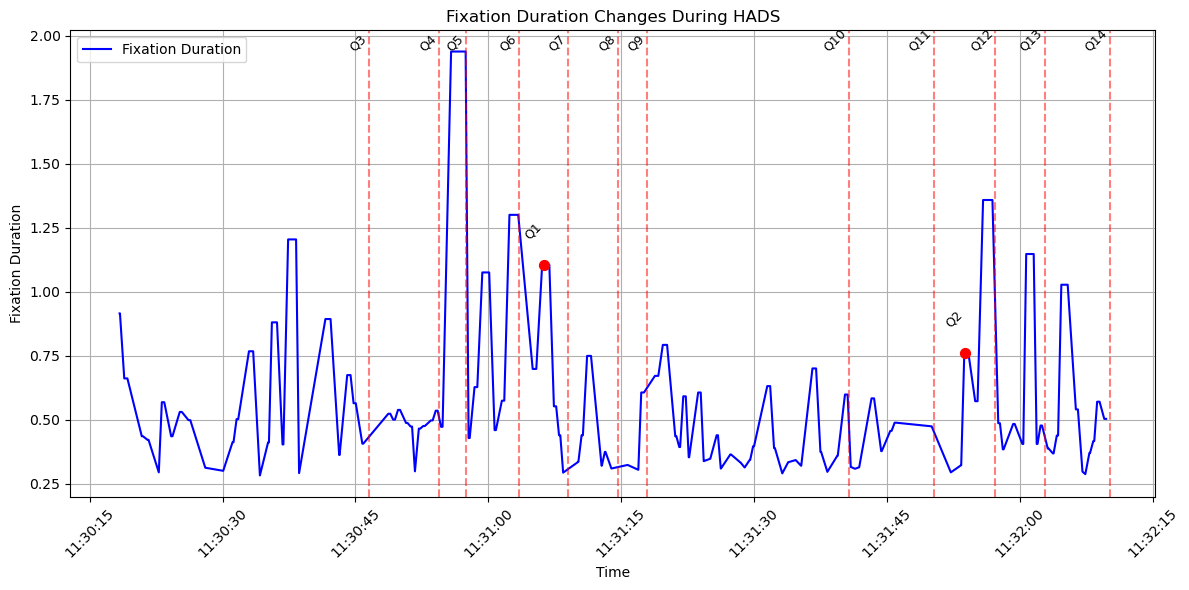

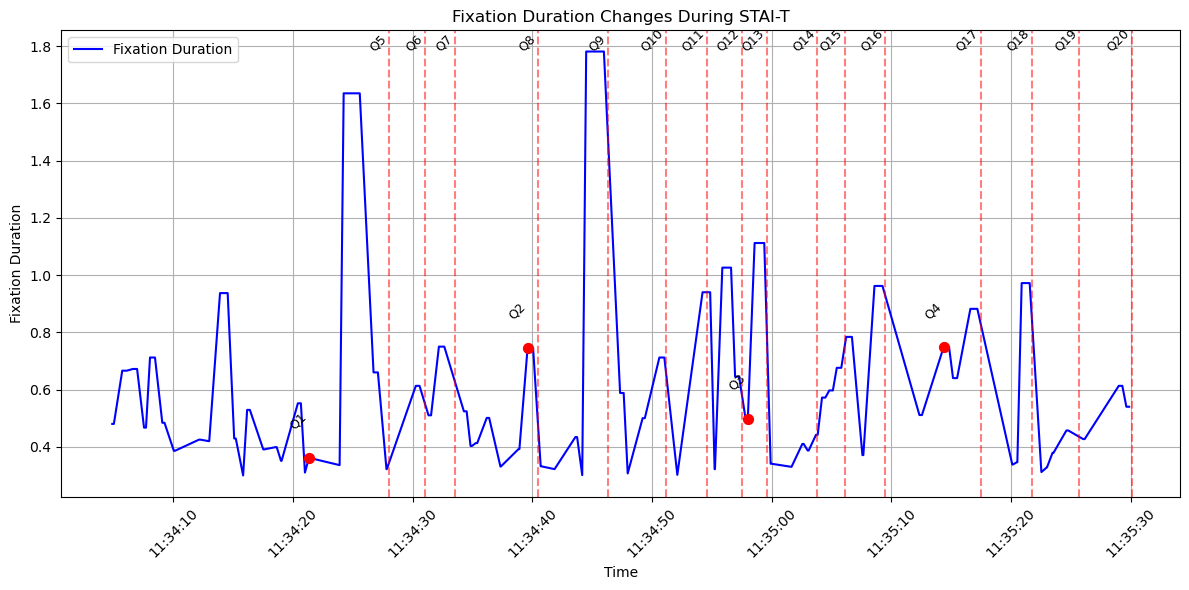

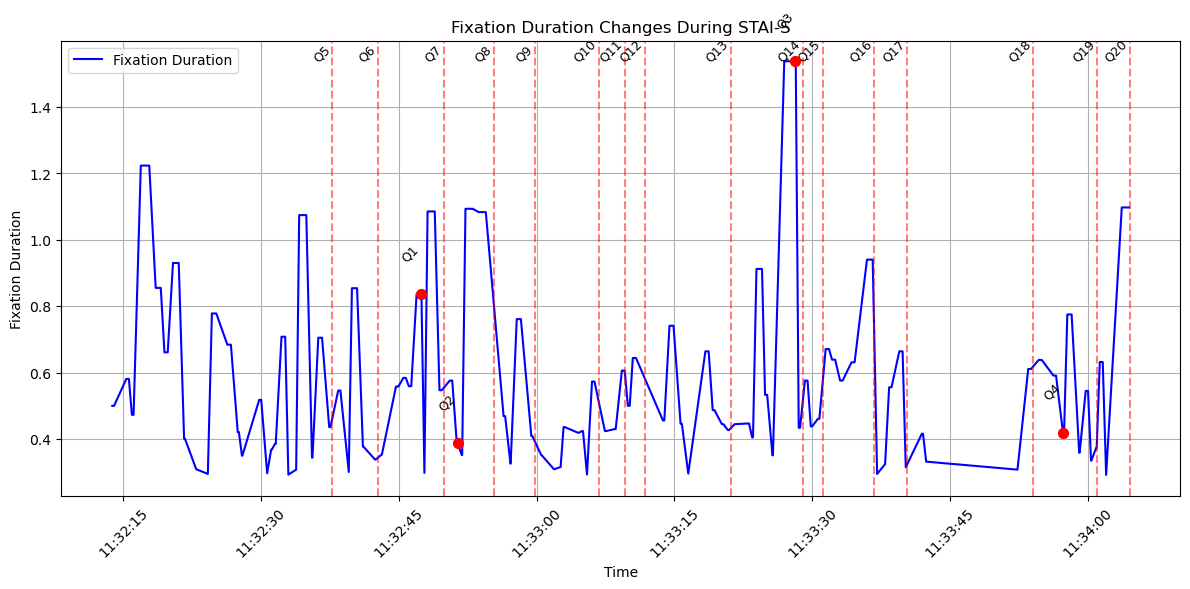

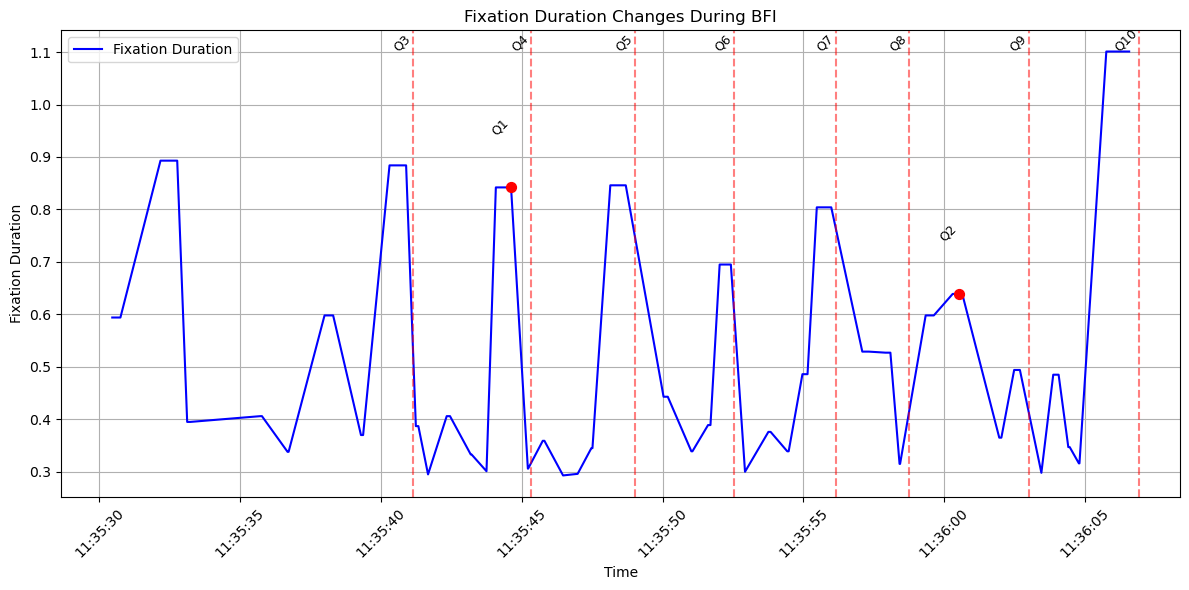

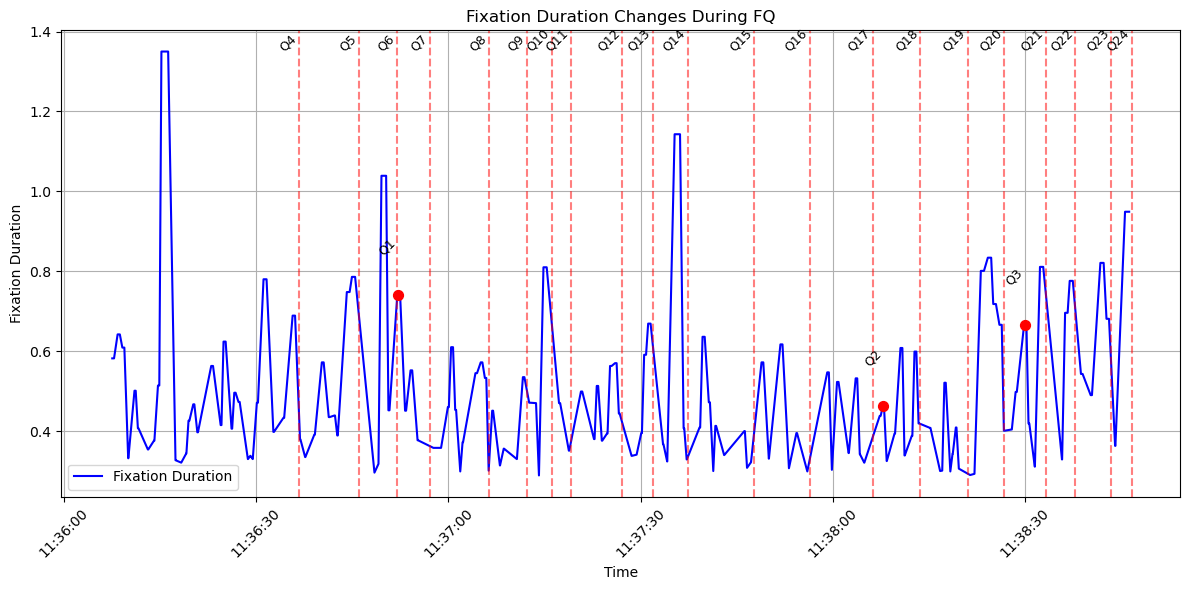

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the eye-tracking data
sed_data_path = '/Users/urmebose/Desktop/People/Nuro/sed_fix_01.csv'
sed_data = pd.read_csv(sed_data_path)

# Convert datetime formats in eye-tracking data
sed_data['datetime'] = pd.to_datetime(sed_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure eye-tracking data is timezone-naive
sed_data['datetime'] = sed_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/People/Nuro/Psychometric_Test_Results_01.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

# Convert datetime columns in psychometric data
psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)

def plot_fixation_duration_for_category(category_name, expected_questions, window_size=20):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter eye-tracking data to match the category times correctly
    category_eye_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (sed_data['datetime'] >= start_time) & (sed_data['datetime'] <= end_time)
        segment = sed_data.loc[mask]
        if not segment.empty:
            category_eye_data = pd.concat([category_eye_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_eye_data.sort_values(by='datetime', inplace=True)
    category_eye_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the fixation duration data using a moving average
    category_eye_data['smoothed_fixation_duration'] = category_eye_data['duration'].rolling(window=window_size).mean()

    # Remove non-finite values
    category_eye_data = category_eye_data[np.isfinite(category_eye_data['smoothed_fixation_duration'])]

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_eye_data['datetime'], category_eye_data['smoothed_fixation_duration'], label='Fixation Duration', color='b')

    # Mark each question's answer time with scatter points and labels
    for i, time in enumerate(question_times, start=1):
        # Find the nearest index in the smoothed data
        if not category_eye_data.empty:
            time_diffs = (category_eye_data['datetime'] - time).abs()
            nearest_idx = time_diffs.idxmin()
            if nearest_idx < len(category_eye_data):
                fixation_duration_at_time = category_eye_data.iloc[nearest_idx]['smoothed_fixation_duration']
                plt.scatter(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time, color='red', s=50, zorder=5)
                plt.text(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time + 0.1, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
            else:
                plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
                plt.text(time, category_eye_data['smoothed_fixation_duration'].max(), f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, 0, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')

    plt.xlabel('Time')
    plt.ylabel('Fixation Duration')
    plt.title(f'Fixation Duration Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust margins for better fit
    plt.show()

# Plot for the HADS category
plot_fixation_duration_for_category('HADS', 14, window_size=20)

# Plot for the STAI-T category
plot_fixation_duration_for_category('STAI-T', 20, window_size=20)

# Plot for the STAI-S category
plot_fixation_duration_for_category('STAI-S', 20, window_size=20)

# Plot for the BFI category
plot_fixation_duration_for_category('BFI', 10, window_size=20)

# Plot for the FQ category
plot_fixation_duration_for_category('FQ', 24, window_size=20)

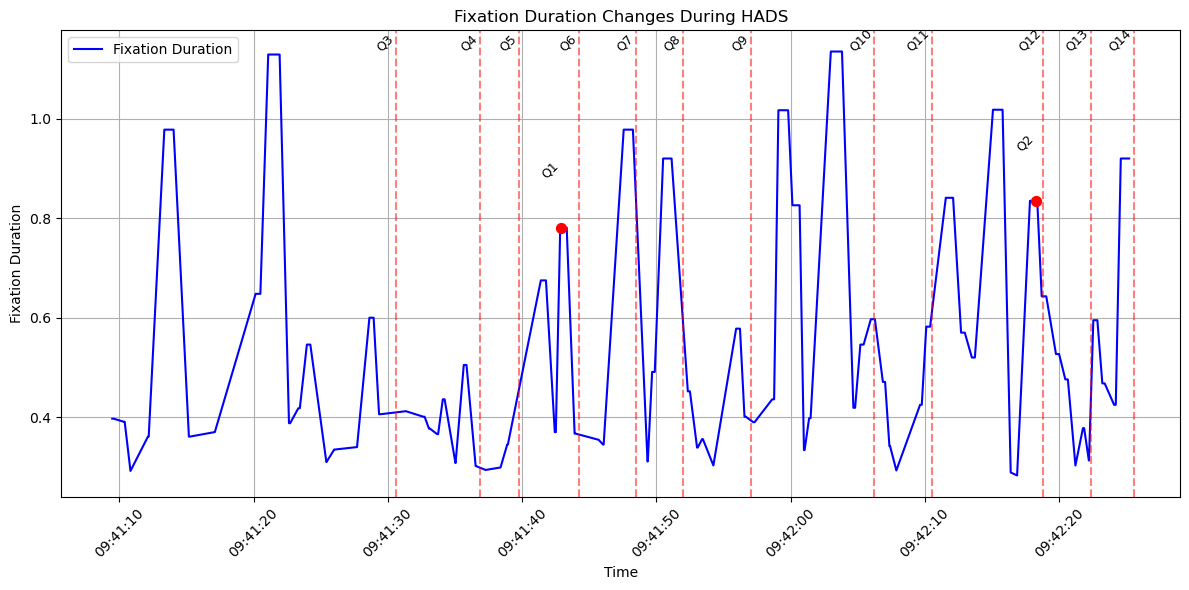

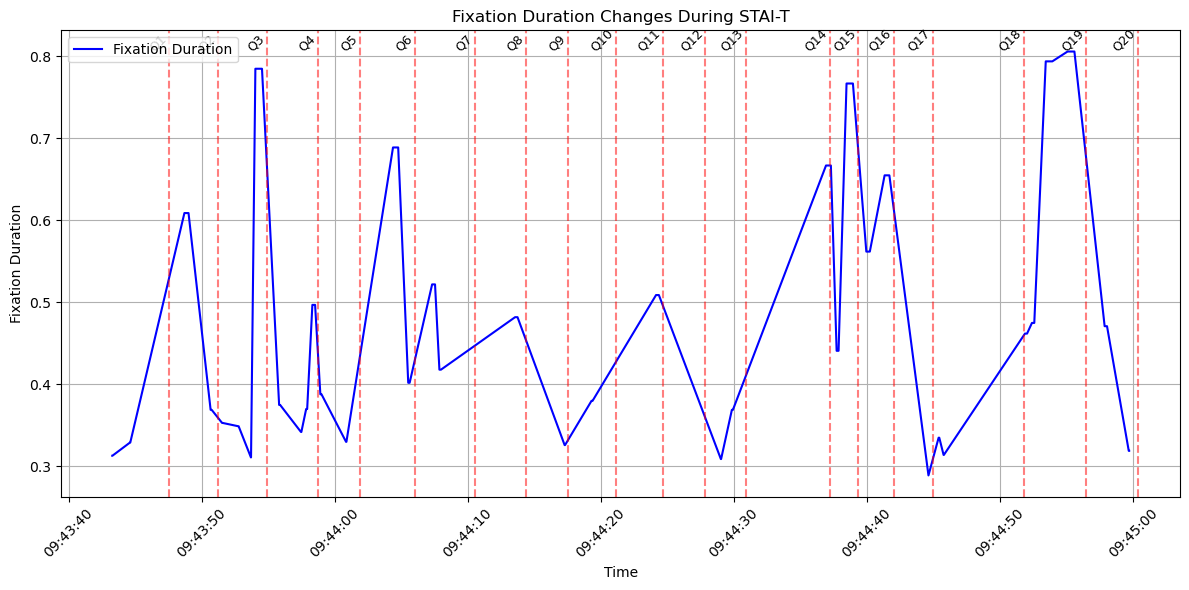

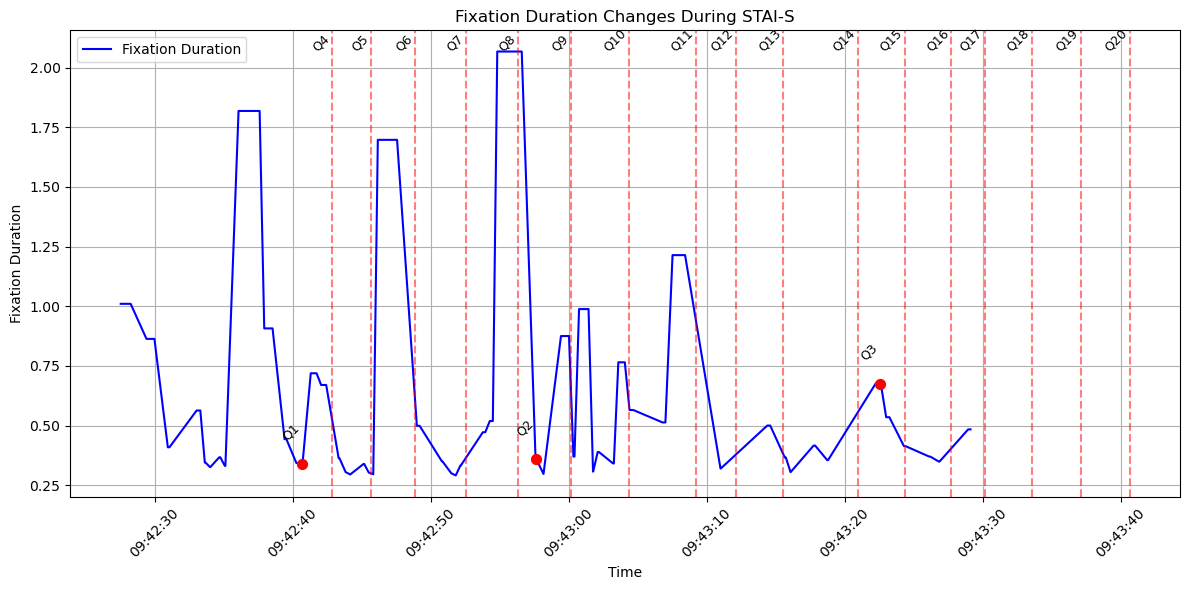

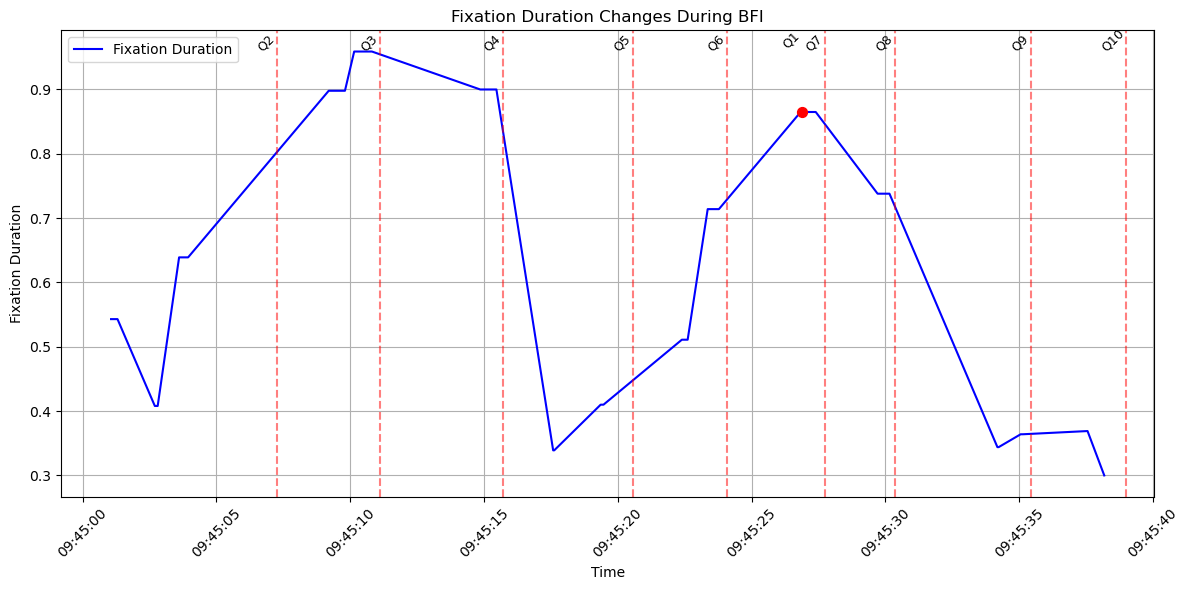

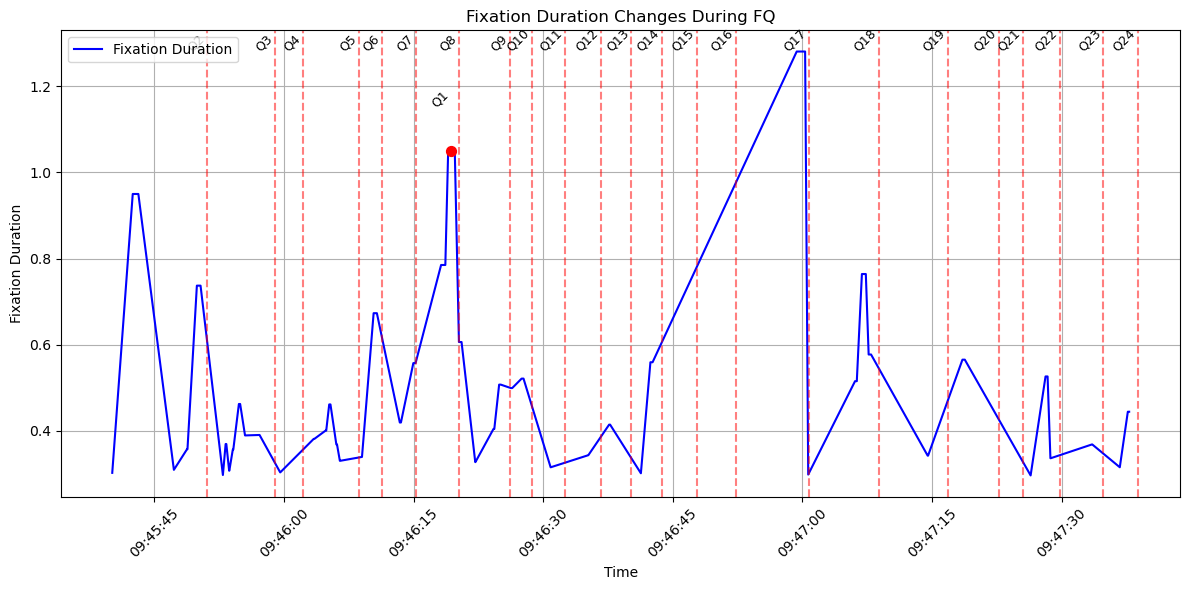

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the eye-tracking data
sed_data_path = '/Users/urmebose/Desktop/People/Nuro/sed_fix_02.csv'
sed_data = pd.read_csv(sed_data_path)

# Convert datetime formats in eye-tracking data
sed_data['datetime'] = pd.to_datetime(sed_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure eye-tracking data is timezone-naive
sed_data['datetime'] = sed_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/People/Nuro/Psychometric_Test_Results_02.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

# Convert datetime columns in psychometric data
psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)

def plot_fixation_duration_for_category(category_name, expected_questions, window_size=20):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter eye-tracking data to match the category times correctly
    category_eye_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (sed_data['datetime'] >= start_time) & (sed_data['datetime'] <= end_time)
        segment = sed_data.loc[mask]
        if not segment.empty:
            category_eye_data = pd.concat([category_eye_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_eye_data.sort_values(by='datetime', inplace=True)
    category_eye_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the fixation duration data using a moving average
    category_eye_data['smoothed_fixation_duration'] = category_eye_data['duration'].rolling(window=window_size).mean()

    # Remove non-finite values
    category_eye_data = category_eye_data[np.isfinite(category_eye_data['smoothed_fixation_duration'])]

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_eye_data['datetime'], category_eye_data['smoothed_fixation_duration'], label='Fixation Duration', color='b')

    # Mark each question's answer time with scatter points and labels
    for i, time in enumerate(question_times, start=1):
        # Find the nearest index in the smoothed data
        if not category_eye_data.empty:
            time_diffs = (category_eye_data['datetime'] - time).abs()
            nearest_idx = time_diffs.idxmin()
            if nearest_idx < len(category_eye_data):
                fixation_duration_at_time = category_eye_data.iloc[nearest_idx]['smoothed_fixation_duration']
                plt.scatter(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time, color='red', s=50, zorder=5)
                plt.text(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time + 0.1, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
            else:
                plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
                plt.text(time, category_eye_data['smoothed_fixation_duration'].max(), f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, 0, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')

    plt.xlabel('Time')
    plt.ylabel('Fixation Duration')
    plt.title(f'Fixation Duration Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust margins for better fit
    plt.show()

# Plot for the HADS category
plot_fixation_duration_for_category('HADS', 14, window_size=20)

# Plot for the STAI-T category
plot_fixation_duration_for_category('STAI-T', 20, window_size=20)

# Plot for the STAI-S category
plot_fixation_duration_for_category('STAI-S', 20, window_size=20)

# Plot for the BFI category
plot_fixation_duration_for_category('BFI', 10, window_size=20)

# Plot for the FQ category
plot_fixation_duration_for_category('FQ', 24, window_size=20)

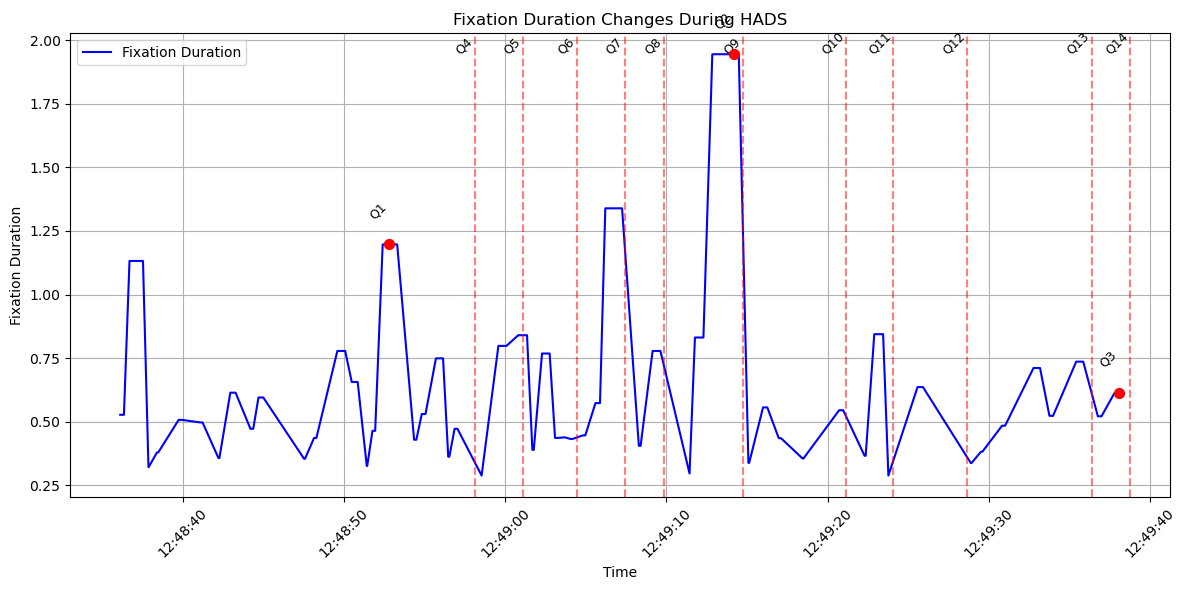

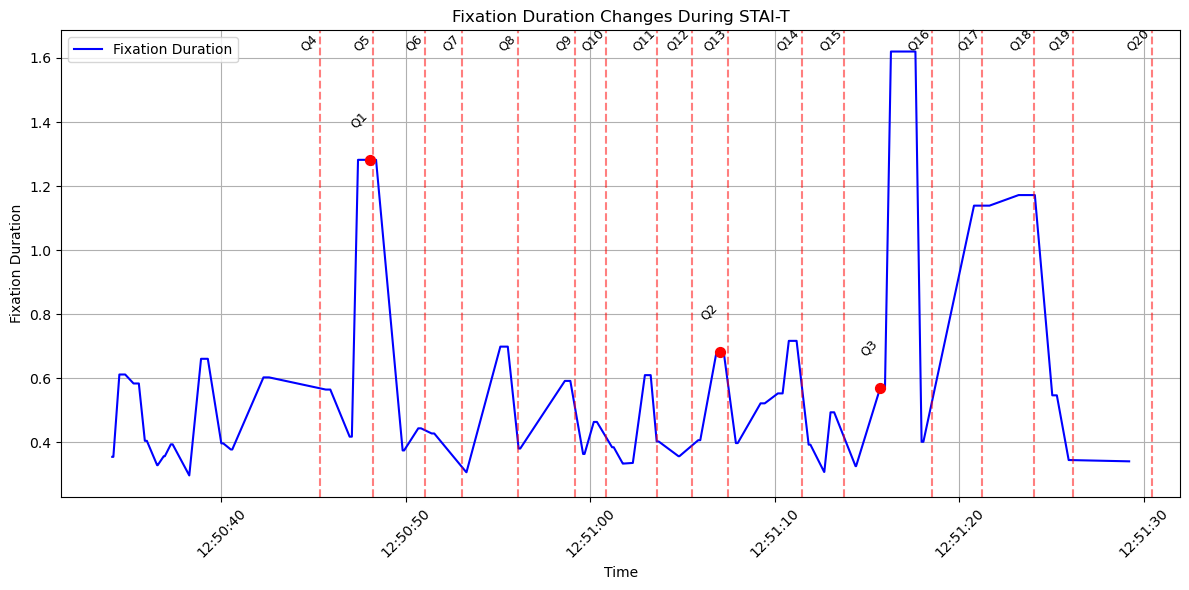

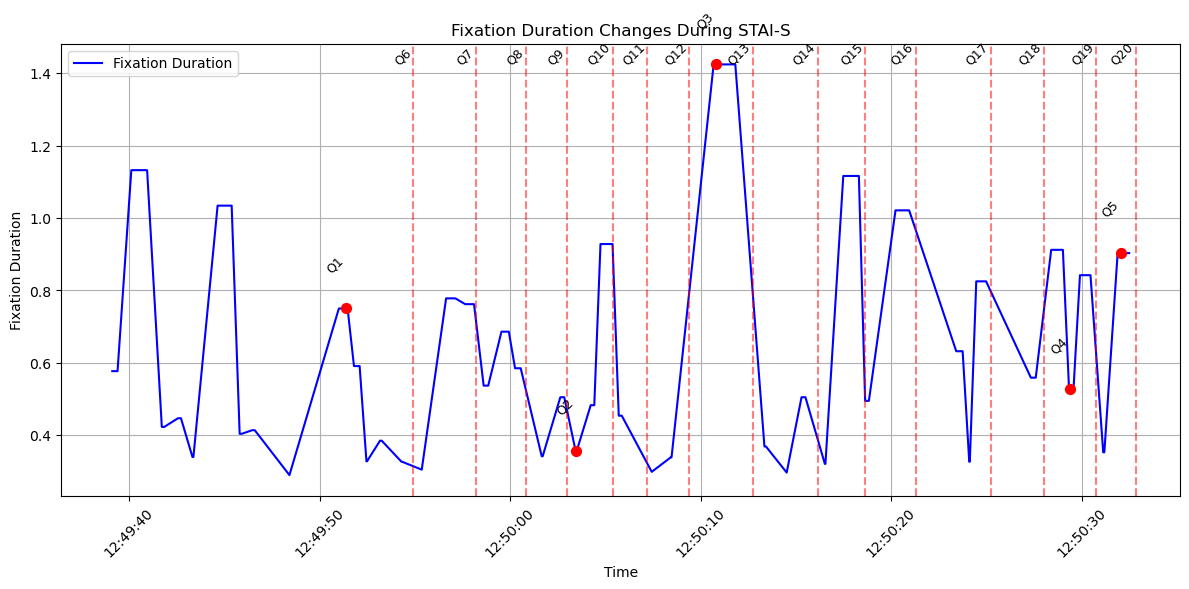

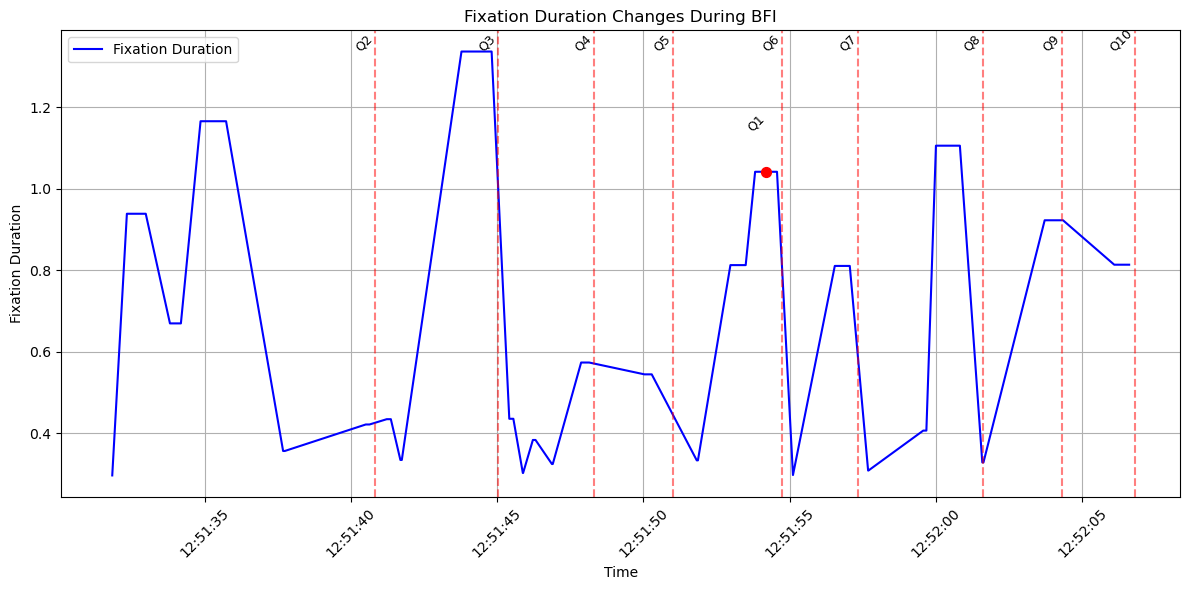

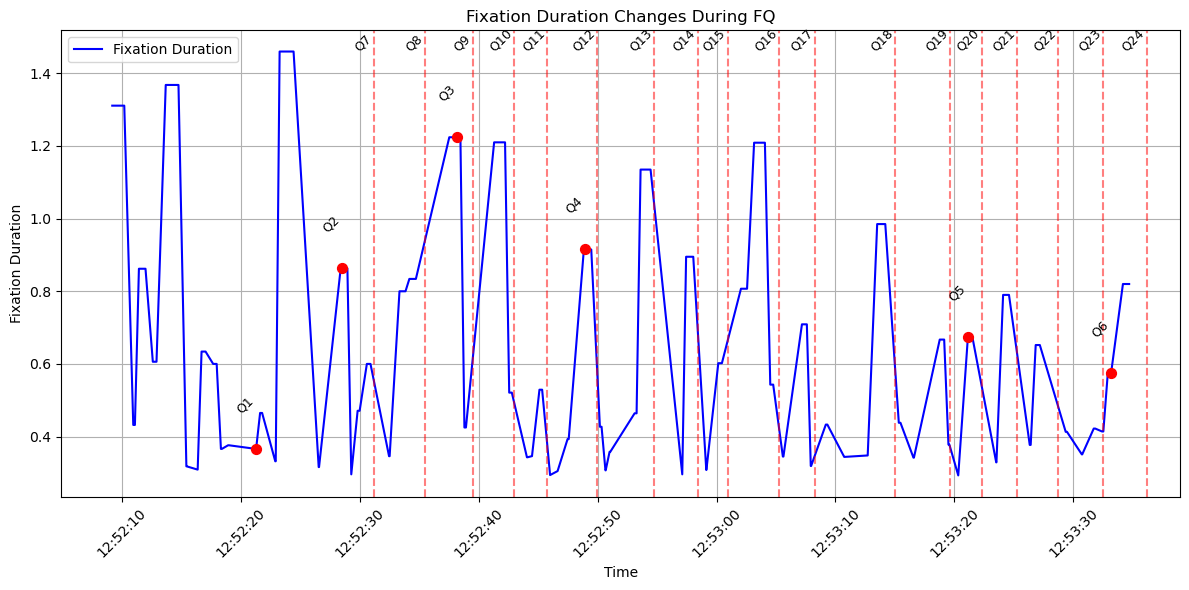

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the eye-tracking data
sed_data_path = '/Users/urmebose/Desktop/People/Nuro/sed_fix_03.csv'
sed_data = pd.read_csv(sed_data_path)

# Convert datetime formats in eye-tracking data
sed_data['datetime'] = pd.to_datetime(sed_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure eye-tracking data is timezone-naive
sed_data['datetime'] = sed_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/People/Nuro/Psychometric_Test_Results_03.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

# Convert datetime columns in psychometric data
psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)

def plot_fixation_duration_for_category(category_name, expected_questions, window_size=20):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter eye-tracking data to match the category times correctly
    category_eye_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (sed_data['datetime'] >= start_time) & (sed_data['datetime'] <= end_time)
        segment = sed_data.loc[mask]
        if not segment.empty:
            category_eye_data = pd.concat([category_eye_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_eye_data.sort_values(by='datetime', inplace=True)
    category_eye_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the fixation duration data using a moving average
    category_eye_data['smoothed_fixation_duration'] = category_eye_data['duration'].rolling(window=window_size).mean()

    # Remove non-finite values
    category_eye_data = category_eye_data[np.isfinite(category_eye_data['smoothed_fixation_duration'])]

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_eye_data['datetime'], category_eye_data['smoothed_fixation_duration'], label='Fixation Duration', color='b')

    # Mark each question's answer time with scatter points and labels
    for i, time in enumerate(question_times, start=1):
        # Find the nearest index in the smoothed data
        if not category_eye_data.empty:
            time_diffs = (category_eye_data['datetime'] - time).abs()
            nearest_idx = time_diffs.idxmin()
            if nearest_idx < len(category_eye_data):
                fixation_duration_at_time = category_eye_data.iloc[nearest_idx]['smoothed_fixation_duration']
                plt.scatter(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time, color='red', s=50, zorder=5)
                plt.text(category_eye_data.iloc[nearest_idx]['datetime'], fixation_duration_at_time + 0.1, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
            else:
                plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
                plt.text(time, category_eye_data['smoothed_fixation_duration'].max(), f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, 0, f'Q{i}', fontsize=9, rotation=45, ha='right', color='black')

    plt.xlabel('Time')
    plt.ylabel('Fixation Duration')
    plt.title(f'Fixation Duration Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust margins for better fit
    plt.show()

# Plot for the HADS category
plot_fixation_duration_for_category('HADS', 14, window_size=20)

# Plot for the STAI-T category
plot_fixation_duration_for_category('STAI-T', 20, window_size=20)

# Plot for the STAI-S category
plot_fixation_duration_for_category('STAI-S', 20, window_size=20)

# Plot for the BFI category
plot_fixation_duration_for_category('BFI', 10, window_size=20)

# Plot for the FQ category
plot_fixation_duration_for_category('FQ', 24, window_size=20)